In [2]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [3]:
from zipfile import ZipFile, BadZipFile

# Specify the path to your zip file
zip_file_path = '/Users/navyakarnas/Desktop/Archive.zip'

# Specify the directory where you want to extract the contents
extract_to_path = '/Users/navyakarnas/Desktop'

# Open the zip file
try:
    with ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_to_path)
    print(f"Extracted files to {extract_to_path}")
except BadZipFile:
    print(f"Error: {zip_file_path} is not a valid zip file or is corrupted.")
    # Add further actions here, like re-downloading or raising an exception
    # depending on your specific scenario

Extracted files to /Users/navyakarnas/Desktop


In [4]:
import pandas as pd
data = pd.read_csv('/Users/navyakarnas/Desktop/Archive/train.csv')

In [5]:
seed = 42
rng = np.random.RandomState(seed)

In [6]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
data['class'].value_counts()

class
1    6174
0    6022
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = []  # Initialize X as an empty list

for img_name in data.image_names:
  img = plt.imread('/Users/navyakarnas/Desktop/Archive/images/' + img_name)
  X.append(img) # Append the image data to the list

# Move the conversion to NumPy array outside the loop
X = np.array(X)  

y = data['class'] # Access the 'class' column using bracket notation

In [9]:
X.shape

(12196, 224, 224, 3)

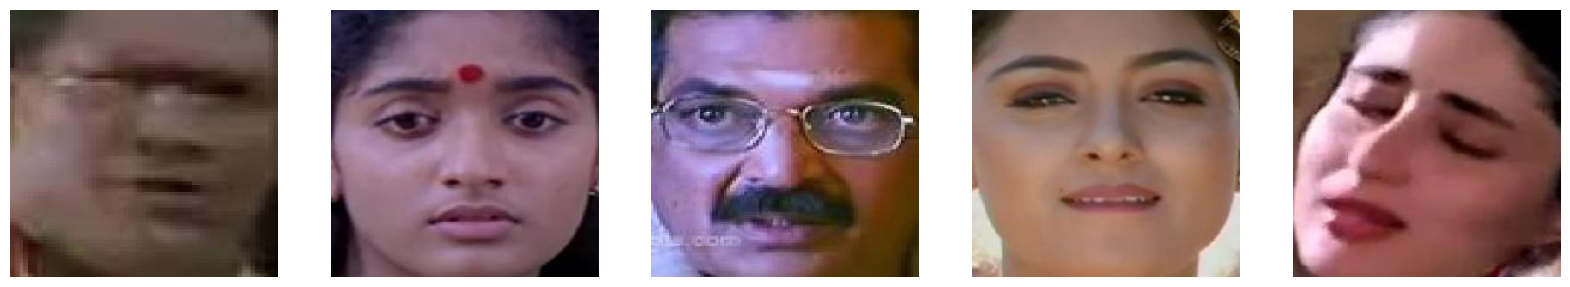

In [10]:
fig,ax = plt.subplots(nrows=1, ncols=5 , figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

In [11]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [12]:
X.min() , X.max()

(0, 255)

In [13]:
X = X/X.max()

In [14]:
X.min() , X.max()

(0.0, 1.0)

In [15]:
X_train, X_valid , Y_train, Y_valid= train_test_split(X,y, test_size=0.3, random_state=seed)

In [16]:
X_train.shape , X_valid.shape , Y_train.shape , Y_valid.shape

((8537, 150528), (3659, 150528), (8537,), (3659,))

In [17]:
model = Sequential() 
model.add(InputLayer(input_shape=(X.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [21]:
model_history= model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_valid, Y_valid))

Epoch 1/50
67/67 [==============================] - 34s 499ms/step - loss: 1.9614 - accuracy: 0.5011 - val_loss: 1.1754 - val_accuracy: 0.5157
Epoch 2/50
67/67 [==============================] - 5s 71ms/step - loss: 0.8443 - accuracy: 0.5022 - val_loss: 0.6939 - val_accuracy: 0.5157
Epoch 3/50
67/67 [==============================] - 4s 65ms/step - loss: 0.6938 - accuracy: 0.4928 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 4/50
67/67 [==============================] - 4s 64ms/step - loss: 0.6933 - accuracy: 0.4923 - val_loss: 0.6930 - val_accuracy: 0.5157
Epoch 5/50
67/67 [==============================] - 4s 60ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6930 - val_accuracy: 0.5157
Epoch 6/50
67/67 [==============================] - 4s 64ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 7/50
67/67 [==============================] - 4s 57ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 8/50


In [22]:
predictions = model.predict(X_valid)[:, 0]
prediction_probabilties = model.predict(X_valid)[:, 0]

115/115 [==============================] - 1s 6ms/step


In [23]:
from sklearn.metrics import accuracy_score
predictions_binary = np.where(predictions >= 0.5, 1, 0) 
print('accuracy on validation set:',accuracy_score(Y_valid, predictions_binary), '%')  

accuracy on validation set: 0.4842853238589779 %


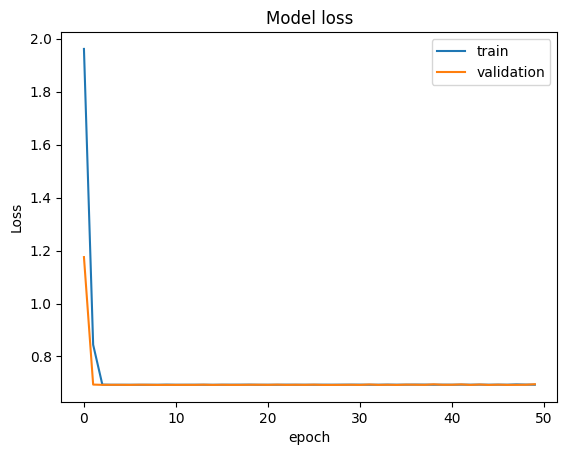

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

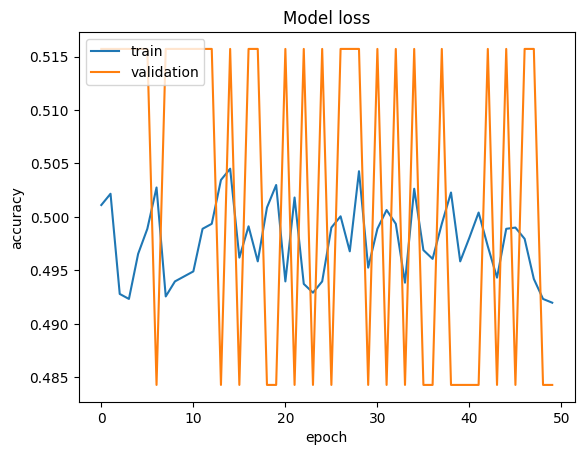

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()